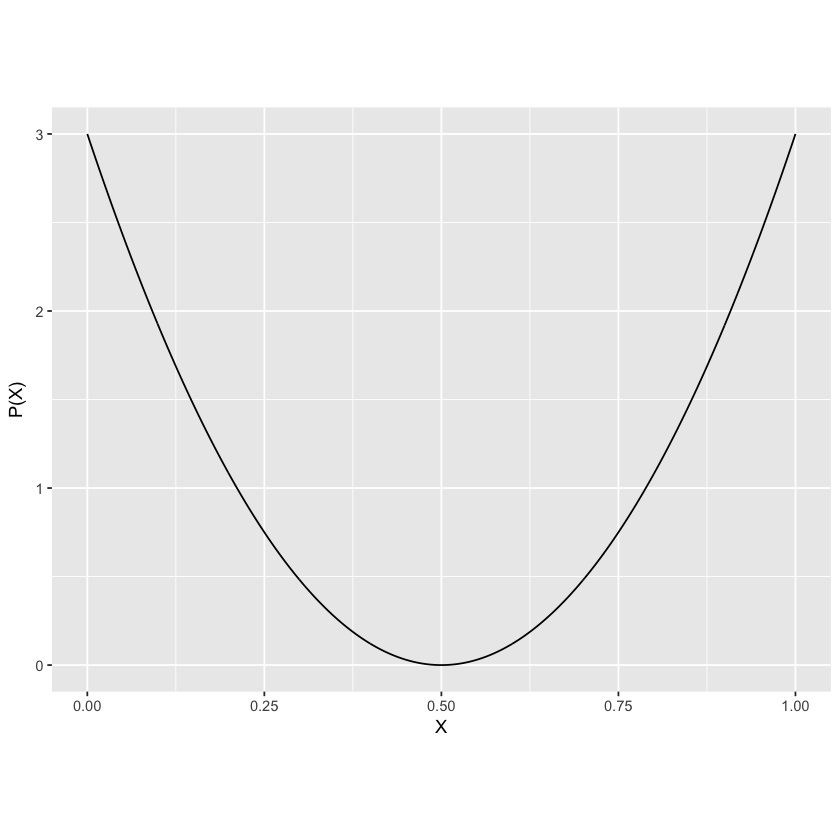

In [5]:
library(ggplot2)

x = seq(0, 1, length.out = 1000)
y = 12 * (x ** 2) - 12 * x + 3

prob.df = data.frame(x=x, y=y)

ggplot(prob.df, aes(x=x, y=y)) + 
    geom_line() +
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

In [15]:
dquad <- function(x, log.p=FALSE) {
    out <- 12 * (x ** 2) - 12 * x + 3
    if (log.p) {
        out <- log(out)
    }
    return(out)
}

dquad(c(0, 0.5, 1))

[1] 3 0 3

In [16]:
pquad <- function(q, log.p=FALSE, lower.tail=TRUE) {
    out <- 4 * (q ** 3) - 6 * (q ** 2) + 3 * q
    
    if (!lower.tail) {
        out <- 1 - out
    }
    
    if (log.p) {
        out <- log(out)
    }
    return(out)
}

pquad(c(0, 0.5, 1))


[1] 0.0 0.5 1.0

In [46]:
delta <- 0.0000001

qquad <- function(p, log.p=FALSE, lower.tail=TRUE) {
    if (log.p) {
        p <- exp(p)
    } 
    
    if (!lower.tail) {
        p <- 1 - p
    }
    out <- list()
    for (target in p) {
        x <- target
        while (abs(target - pquad(x)) > delta) {
            # step <- (target - pquad(x)) / dquad(x)
            # print(paste(target, pquad(x), x, step))
            # x <- x + step
            x <- x + ((target - pquad(x)) / dquad(x))
        }
        out <- append(out, x)
    }
    
    return(unlist(out))
}

pquad(qquad(c(0.3, 0.5, 0.7)))

[1] 0.2999999 0.5000000 0.7000001

In [90]:
rquad <- function(n, efficient_sample=FALSE) {
    out <- list()
    counter <- 0
    while (length(out) < n) {
        if (efficient_sample) {
            x <- runif(1, 0, 0.5)
            y <- runif(1, 0, 3)
            # If over the line between (0,3) and (0.5,0), consider it as from the other side
            if (y > -6 * x + 3) {
                x <- x + 0.5
                y <- 3 - y
            }
        } else {
            x <- runif(1, 0, 1)
            y <- runif(1, 0, 3)
        }
        
        if (y < dquad(x)) {
            out <- append(out, x)
        }
        counter <- counter + 1
    }
    print(paste('Took', counter, 'samples', sep = ' '))
    return(unlist(out))
}

rquad(100)
rquad(100, efficient_sample = TRUE)

[1] "Took 334 samples"


[1] 0.0129428182 0.2303045716 0.1475578460 0.9602940471 0.1043309409
  [6] 0.9582123025 0.9394364832 0.7233478918 0.7268348366 0.1257847503
 [11] 0.1055241639 0.9100812213 0.8227277684 0.0914903551 0.9994369457
 [16] 0.0873671342 0.9672405883 0.6754925642 0.9360718289 0.7291767108
 [21] 0.8509678037 0.0731493495 0.6619798117 0.0007720387 0.1093823756
 [26] 0.9250771785 0.1314082209 0.2575361838 0.9270990456 0.0461972670
 [31] 0.2047993755 0.0451764190 0.9890744169 0.0737148970 0.2038885886
 [36] 0.9824658136 0.1935041444 0.0494473143 0.9744639073 0.8725575784
 [41] 0.0137541466 0.2095517134 0.9358054381 0.1559454540 0.8476945411
 [46] 0.8208462698 0.1197019010 0.0996606848 0.9876606963 0.7783623687
 [51] 0.8907964339 0.0343979790 0.0820279589 0.0118651018 0.9820747369
 [56] 0.3730589144 0.1614201071 0.9524334383 0.0836962380 0.0354958412
 [61] 0.9216423989 0.6294941355 0.0598468995 0.9004910423 0.3725281833
 [66] 0.8752259363 0.9535685824 0.1361715917 0.2415689980 0.8380014747
 [71] 0.1586901017 0.0179356199 0.7598160442 0.9769787067 0.7374747121
 [76] 0.0190140831 0.0828609390 0.9909233013 0.9465028821 0.9000991320
 [81] 0.9863352859 0.9028697533 0.2525016917 0.6154497848 0.0436483449
 [86] 0.9057996206 0.1274528983 0.9420010492 0.7987665005 0.1749276330
 [91] 0.6932170293 0.1658946483 0.0291059597 0.9949966227 0.7423330795
 [96] 0.0034231467 0.0778719049 0.9893142323 0.8699770200 0.0397070744

[1] "Took 143 samples"


[1] 0.826158753 0.897300595 0.934471981 0.963150451 0.989236699 0.904739552
  [7] 0.985300919 0.823049389 0.998422033 0.793459648 0.858321923 0.902566237
 [13] 0.779352223 0.832048380 0.819546807 0.069216775 0.062363563 0.150906668
 [19] 0.643353495 0.159342118 0.056213871 0.817534529 0.985210868 0.915209230
 [25] 0.004761273 0.855022360 0.924490245 0.842209988 0.028246243 0.707773997
 [31] 0.177286399 0.021869457 0.053791633 0.892918672 0.291676944 0.971685691
 [37] 0.089869594 0.126295303 0.272127622 0.862351360 0.029616107 0.864055330
 [43] 0.956312115 0.741568137 0.052029431 0.055649129 0.439010145 0.016480652
 [49] 0.100390776 0.875420340 0.173338366 0.887231051 0.231689458 0.910769797
 [55] 0.022236395 0.003836318 0.862931109 0.006570370 0.980023690 0.107335499
 [61] 0.976450795 0.064427998 0.099069042 0.913917175 0.005068679 0.032898707
 [67] 0.371742610 0.817684727 0.243813770 0.037062847 0.027481660 0.166783075
 [73] 0.896508719 0.921153685 0.650297330 0.002662938 0.038665626 0.842677471
 [79] 0.260539476 0.113687199 0.226364471 0.745313534 0.899869237 0.305905862
 [85] 0.040929556 0.014389297 0.090777927 0.989367707 0.215461193 0.884648160
 [91] 0.994705157 0.026411759 0.997028394 0.169582555 0.017561944 0.065780856
 [97] 0.996836570 0.819829292 0.991689024 0.012501206

[1] "Took 29866 samples"


[1] "Took 15069 samples"


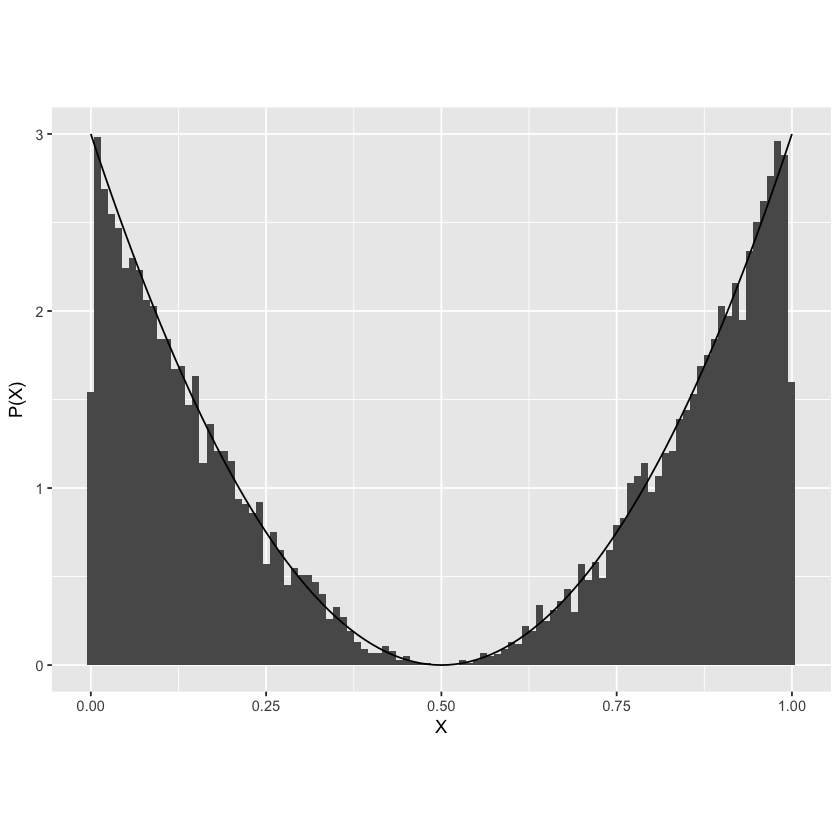

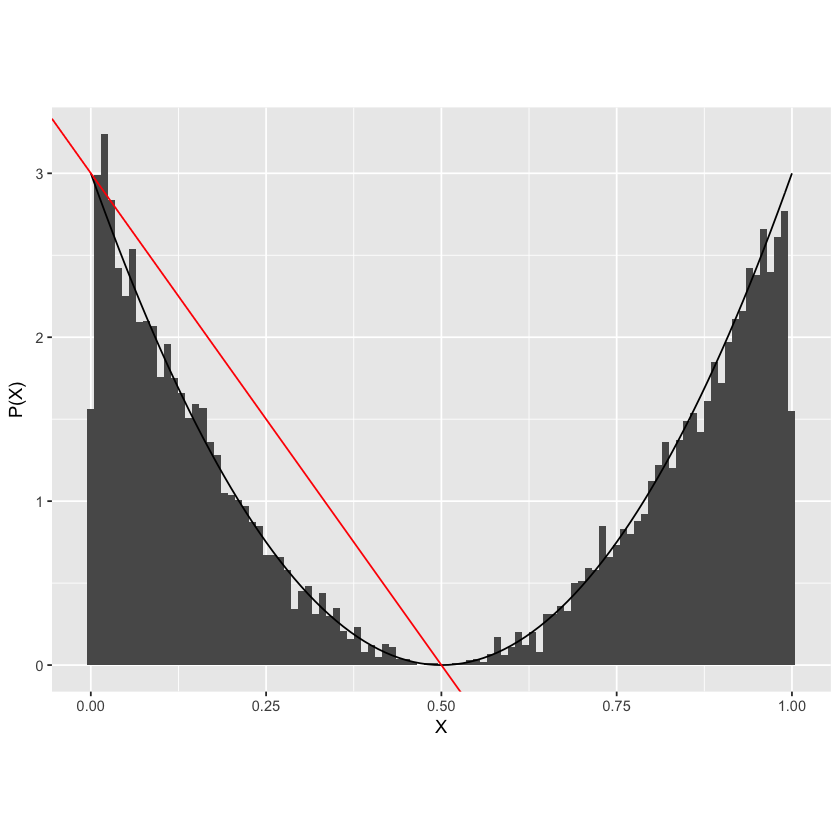

In [91]:
SAMPLE_SIZE <- 10000
sample.df <- data.frame(x=rquad(SAMPLE_SIZE))

ggplot(sample.df, aes(x=x)) +
    geom_histogram(aes(y=..density.. ), binwidth=0.01) + 
    stat_function(fun=dquad) +
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

sample.df <- data.frame(x=rquad(SAMPLE_SIZE, efficient_sample = TRUE))

ggplot(sample.df, aes(x=x)) +
    geom_histogram(aes(y=..density.. ), binwidth=0.01) + 
    stat_function(fun=dquad) +
    geom_abline(slope=-6, intercept=3, color=2) + 
    theme(aspect.ratio=3/4) + 
    xlab("X") + 
    ylab("P(X)")

[[1]]
[1] 5